# Styles and formatting

Any ``Element`` object in **fivecentplots** (legend, axis, label, etc.) has certain properties like edge color, fill color, font size that can be styled.  Each of the properties can be set by passing the appropriate keyword to the function call to make the plot or by setting a new default value in a custom theme file.  Examples of style changes are described below.

For more details, review the <a href='fcp.html#api'>API section</a> for the ``Element`` of interest

## Setup

Import packages:

In [1]:
%load_ext autoreload
%autoreload 2
import fivecentplots as fcp
import pandas as pd
from pathlib import Path

Read some dummy data for examples:

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
df_box = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_box.csv')
df_hist = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_box.csv')

Optionally set the design theme (skipping here and using default):

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Colors

### Fill colors

Many elements in a plot have a fill color (such as axes, figure background, markers, etc.).  These fill colors are accessible using the standard keyword nomenclature for elements:

``<element name>_<major|minor axis type (if any)>_<x|y|z axis (if any)>_<element attribute name>``

where element attribute name in this case is ``_fill_color``.  <i>All colors are specified using 6-digit hex codes.</i>

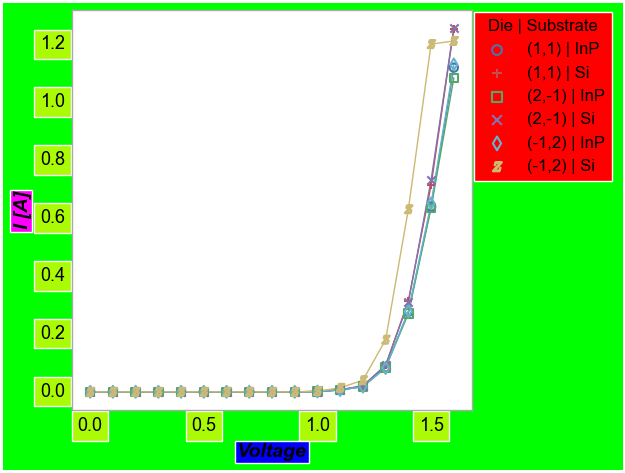

In [4]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_fill_color='#00FF00', legend_fill_color='#FF0000', ax_fill_color='#FFFFFF',
         label_x_fill_color='#0000FF', label_y_fill_color='#FF00FF', 
         tick_labels_major_fill_color='#AAFB05')

### Edge colors

#### Typical elements

Many elements in a plot also support an edge color (i.e., the border around an object).  These edge colors are accessible using the standard keyword nomenclature of the element name followed by `_edge_color`. Additionally, the width of the edge or border can be specified via keyword using the name of the element followed by `_edge_width`.

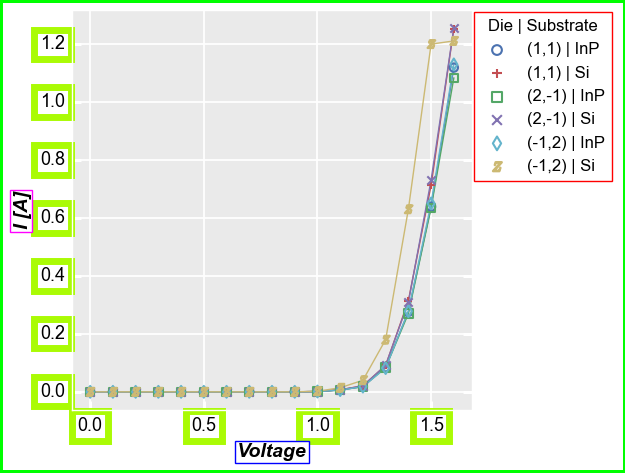

In [5]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_edge_color='#00FF00', legend_edge_color='#FF0000', ax_edge_color='#FFFFFF',
         label_x_edge_color='#0000FF', label_y_edge_color='#FF00FF',
         tick_labels_major_edge_color='#AAFB05', tick_labels_major_edge_width=5)

#### Axes edges

When dealing with the axes area, the borders (also known as "spines") can be enabled/disabled on an individual basis.  Individual edges can be turned on or off individually using the keyword `spine_<bottom|top|left|right>` or `spines` to simultaneously toggle all of them at once:

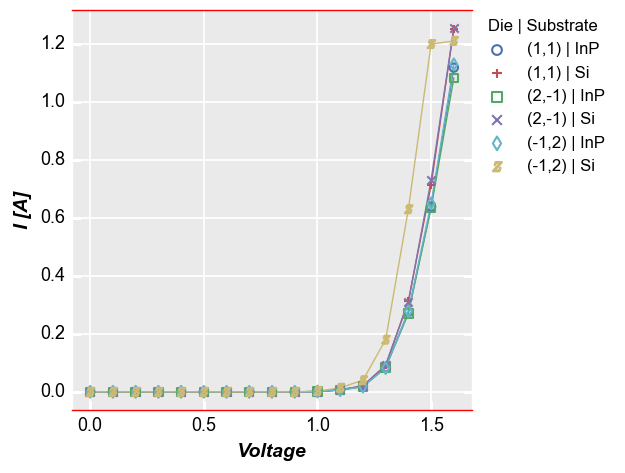

In [6]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ax_edge_color='#FF0000', ax_edge_left=False, ax_edge_right=False)

### Alpha

Elements also support alpha for transparency.  By default, ``alpha=1`` for most elements, but this can be changed using the standard keyword nomenclature of the element name followed by an underscore and the keyword ``_fill_alpha`` or ``_edge_alpha``.  The alpha value is a float ranging from 0 (full opacity) to 1 (no opacity).  

.. note:: Internally, the alpha level is converted into hex and appended to the fill or edge color value to make an 8-character hex color code.  

Consider the fill example above, with alpha applied to the fill colors:

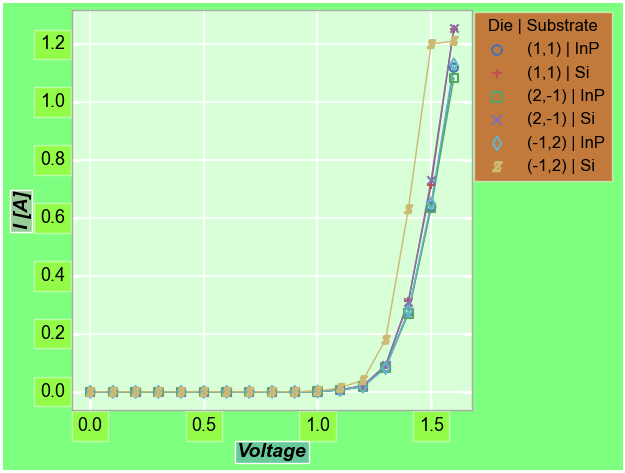

In [7]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'],
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_fill_color='#00FF00', fig_fill_alpha=0.5,
         legend_fill_color='#FF0000', legend_fill_alpha=0.52,
         ax_fill_color='#FFFFFF', ax_fill_alpha=0.7,
         label_x_fill_color='#0000FF', label_x_fill_alpha=0.2,
         label_y_fill_color='#FF00FF', label_y_fill_alpha=0.2,
         tick_labels_major_fill_color='#AAFB05', tick_labels_major_fill_alpha=0.45)

When adding alpha to plot markers, the legend markers will retain full opacity by default:

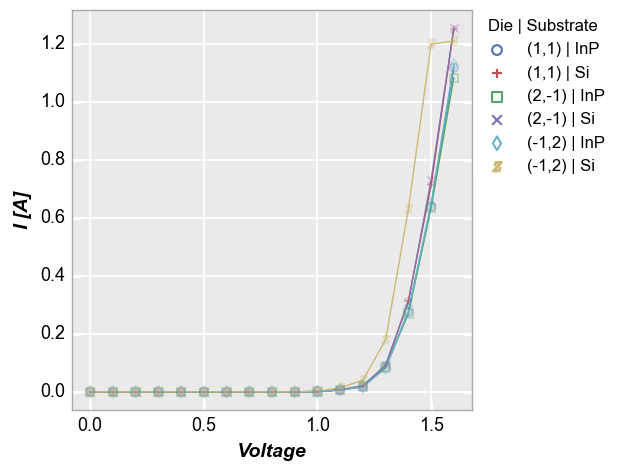

In [8]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_edge_alpha=0.3)

However, alpha can be applied within the legend if kwarg ``legend_marker_alpha`` is defined:

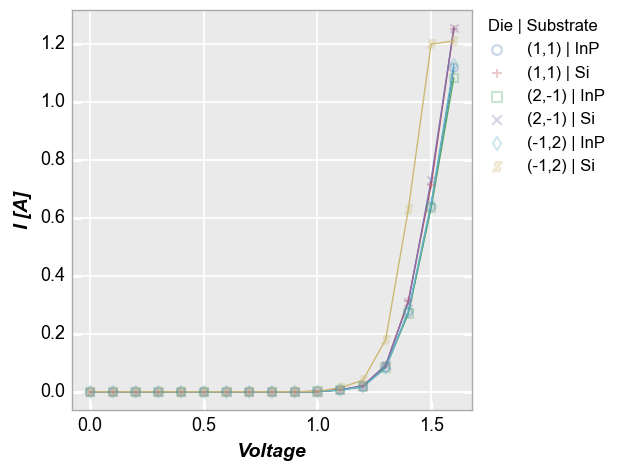

In [9]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_edge_alpha=0.3, legend_marker_alpha=0.3)

### Line colors

#### Built-in color list

All connecting lines drawn through markers in a plot can be colored.  **fivecentplots** comes with a built-in list of line (and marker) colors (this is just an expanded set of colors from the terrific default palette in the **seaborn** plotting library).  This color pattern repeats indefinitely in case the number of plotted lines exceeds the length of the built-in list.

.. image:: _static/images/colors.png

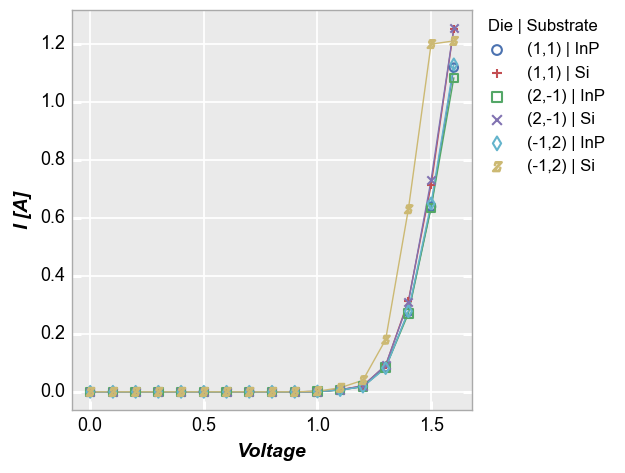

In [10]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

#### Custom color list

The built-in list of colors can be overridden by passing a list of hex-based color codes to the `colors` keyword.  Like the built-in list, the custom list will also cycle back to the start if there are more lines than colors.

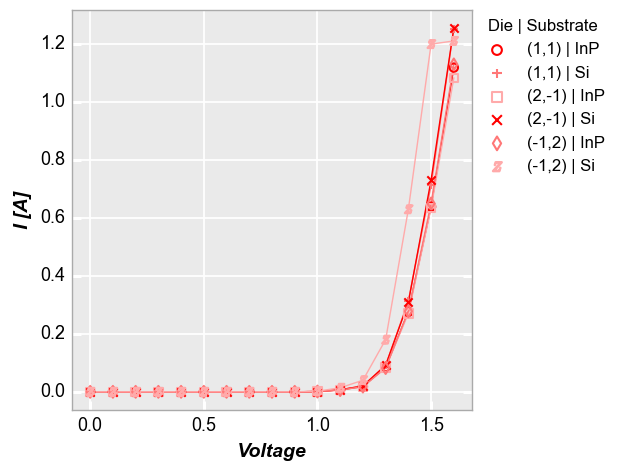

In [11]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'],
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         colors=['#FF0000', '#FF7777', '#FFAAAA'])

#### Custom colors from default

We can also select certain colors from the default color list *by index* rather than specifying the full hex color code:

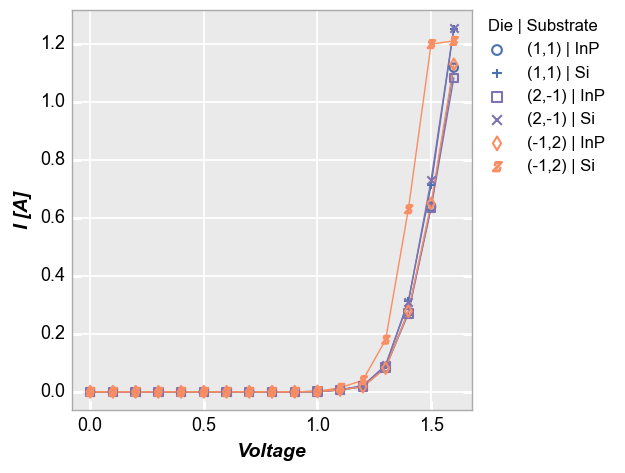

In [12]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         colors=[0, 0, 3, 3, 6, 6])

#### Colormap

The color list can be replaced by a discretized colormap using the keyword ``cmap``:

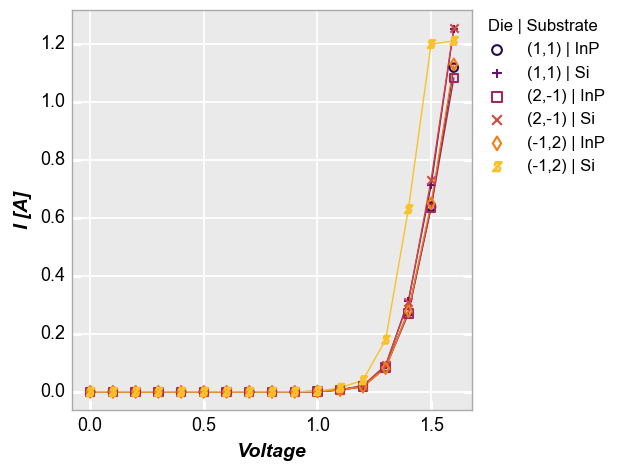

In [13]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         cmap='inferno')

#### Line styling

Plot lines do not have a traditional "fill" or "edge" so the styling keywords are simplified to ``lines_color``, ``lines_width``, ``lines_style`` and ``lines_alpha``:

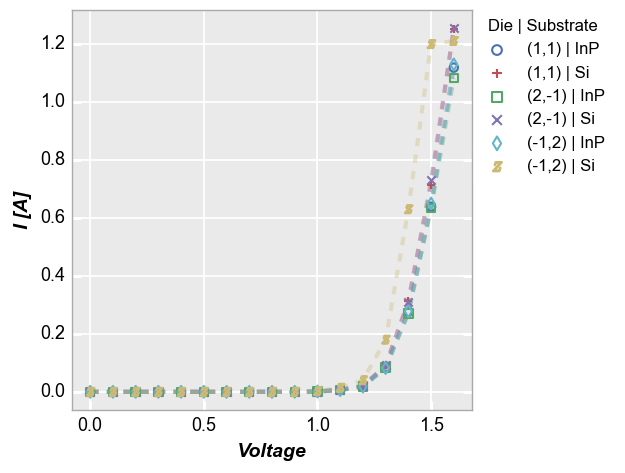

In [14]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         lines_alpha=0.33, lines_style='--', lines_width=3)

The nomenclature above of `lines_<some property>` stems from the fact that plot line properties are contained in the `lines` Element class.  However, because strict adherence to the **fivecentplot** ``Element`` naming convention in this case sounds wrong, non-plural versions of these keywords are also supported:
* `lines_color` --> `line_color`
* `lines_width` --> `line_width`
* `lines_style` --> `line_style`
* `lines_alpha` --> `line_alpha`

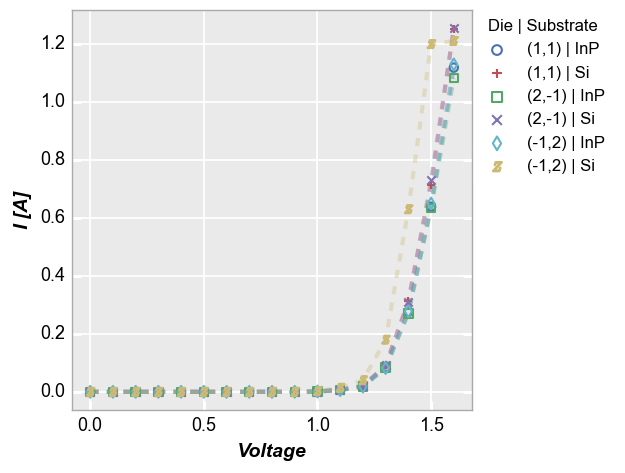

In [15]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'],
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         line_alpha=0.33, line_style='--', line_width=3)

### Marker colors

A data point marker has both an edge and a fill color, each with its own unique value of transparency (or alpha).  By default, marker fill is disabled and marker edge color is matched to the line color with no transparency.  However, we can override any of these as shown below.

<b>Change the marker edge color for all markers:</b>

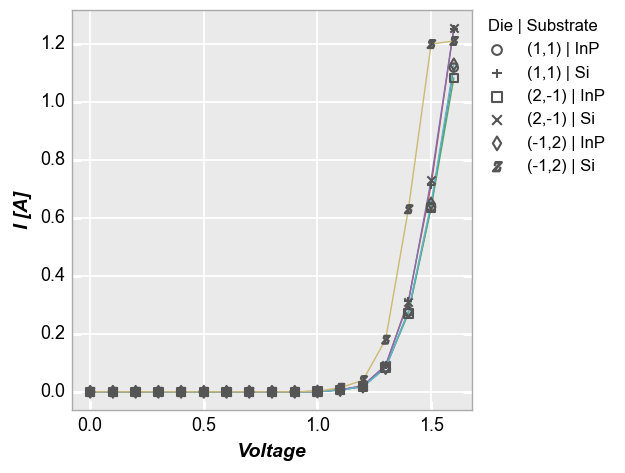

In [16]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_edge_color=['#555555'])

<b>All a custom fill color:</b>

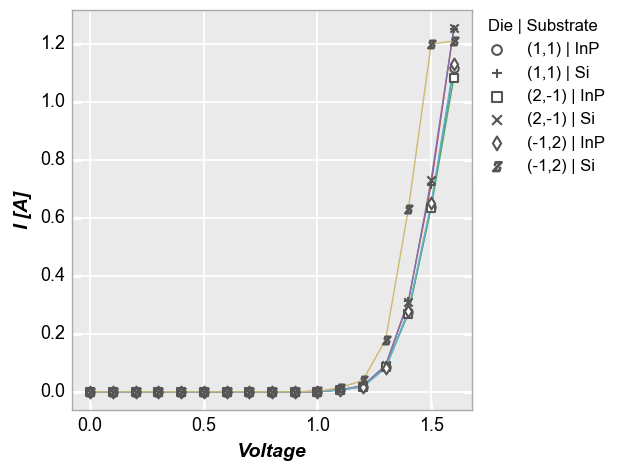

In [17]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_edge_color=['#555555'], marker_fill_color='#FFFFFF')

<b>Use the default color scheme with marker fill:</b>

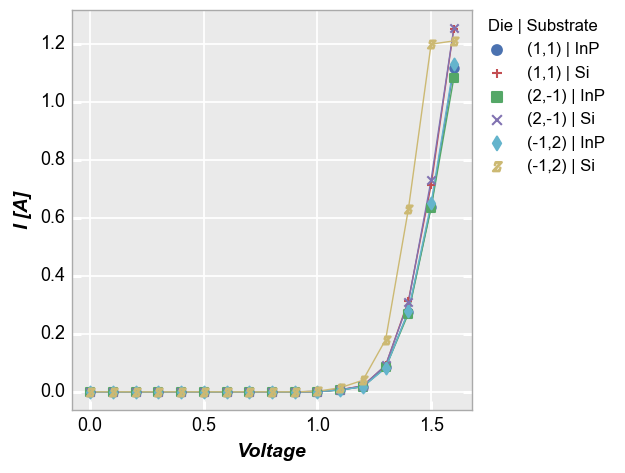

In [18]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_fill=True)

<b>Add fill alpha:</b>

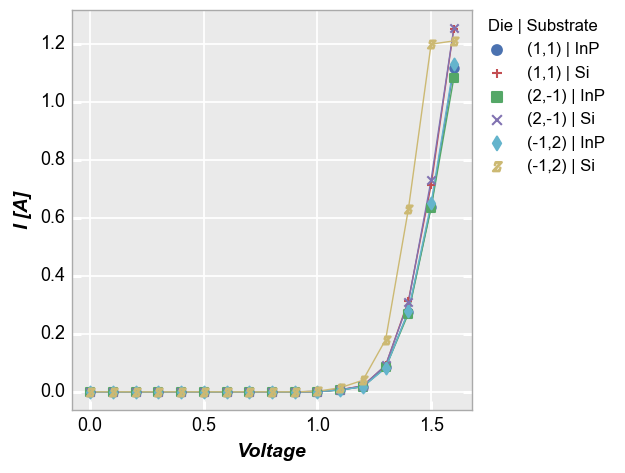

In [19]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_fill=True, marker_fill_alpha=0.5)

### Boxplot example

Boxplots have color options for the boxes or violins that are drawn behind the markers:

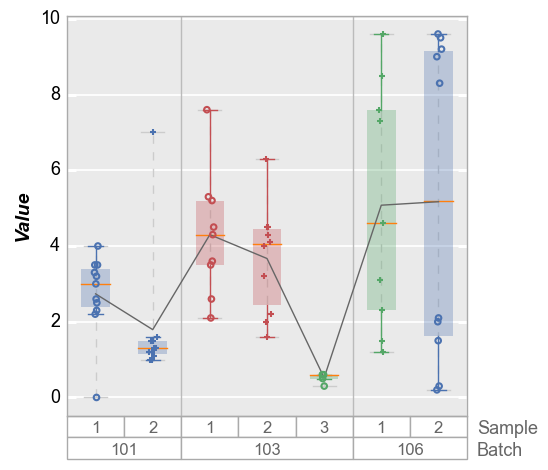

In [20]:
fcp.boxplot(df_box, y='Value', groups=['Batch', 'Sample'], 
            box_fill_color=[0, 0, 1, 1, 2, 2], box_fill_alpha=0.3, box_edge_width=0,
            marker_edge_color=[0, 0, 1, 1, 2, 2], marker_type=['o', '+'], 
            box_whisker_color=[0, 0, 1, 1, 2, 2], box_whisker_width=1)

### Histogram example

By default, histograms have a fill alpha value of 0.5 (unless overriden by the theme file or keyword).  This can easily be tailored for a different style.  Compare the default plot:

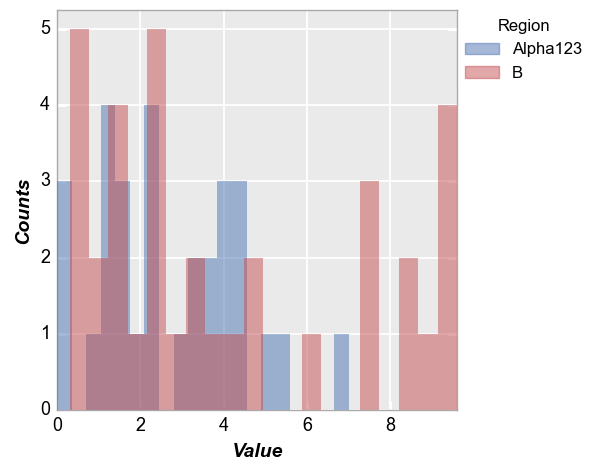

In [21]:
fcp.hist(df_hist, x='Value', legend='Region')

with this one, that employs the `hist_fill_alpha` keyword:

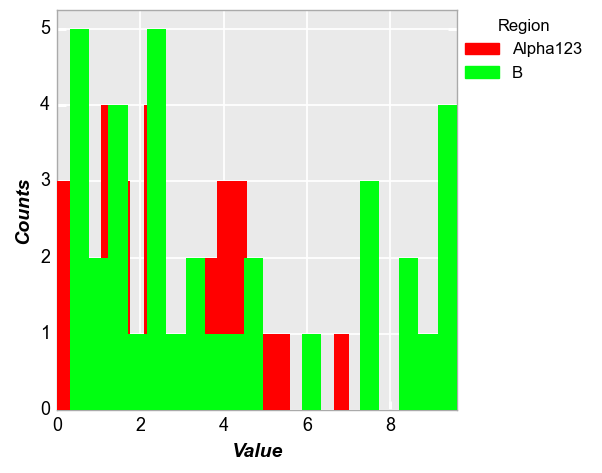

In [22]:
fcp.hist(df_hist, x='Value', legend='Region', hist_fill_alpha=1, colors=['#FF0000', '#00FF11'])

The benefit of transparency is clear in order to visualize both distributions simultaneously.

## Styles

### Line styles

We can define custom line styles for each line, instead of applying them globally.  Line styles are defined by specific characters as defined by **matplotlib**: {‘-‘; ‘–’; ‘-.’ ‘:’}

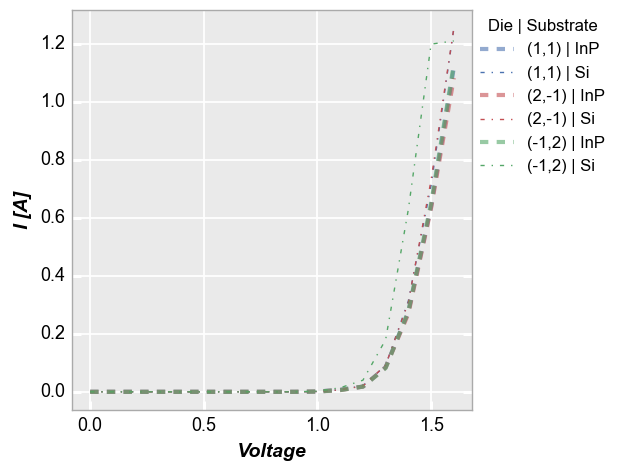

In [23]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], markers=False, 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         colors=[0, 0, 1, 1, 2, 2], 
         lines_width=[3, 1, 3, 1, 3, 1], lines_style=['--', '-.'], lines_alpha=[0.6, 1])

## Markers

### Marker type

**fivecentplots** comes with a built-in list of marker styles:

.. image:: _static/images/markers.png

You can specify your own markers by passing a list of marker string characters to the `markers` keyword.  These characters can be special characters for the selected plotting engine (for example, with `matplotlib` as an engine `'d'` = diamond) or other alpha-numeric values.  As with colors, the marker list will loop back on itself if the number of curves exceeds the number of items in the list.

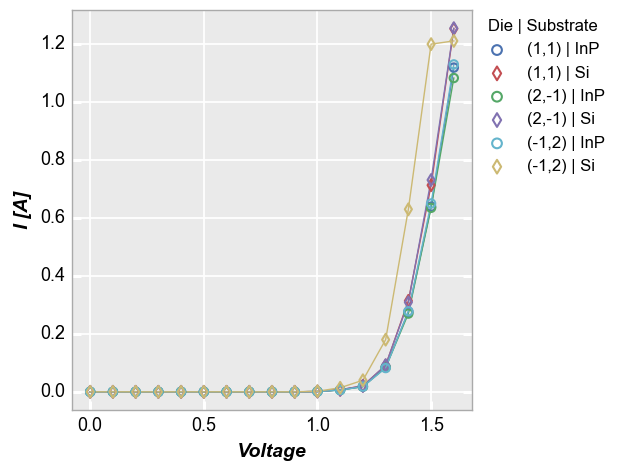

In [24]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'],
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         markers=['o', 'd'])

We can also remove markers for specific curves in the legend using the keyword `None` (to remove all markers just set ``markers=None``):

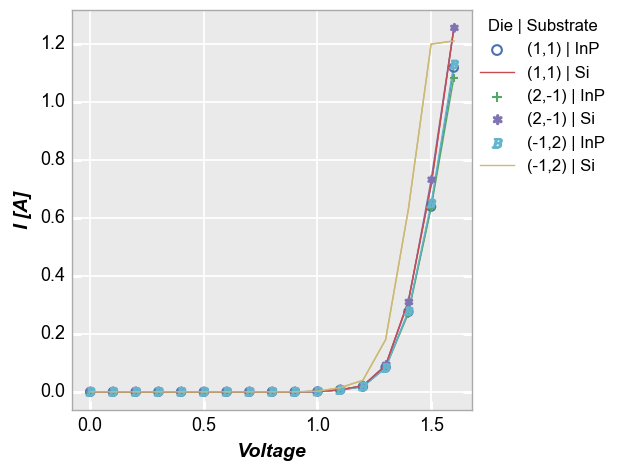

In [25]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         markers=['o', None, '+', '*', 'B', None])

### Marker size

The size of the markers within the plot window are controlled by the `marker_size` keyword.  All data sets share the same marker size.  Notice that the legend markers do not automatically scale their size with the markers on the plot.

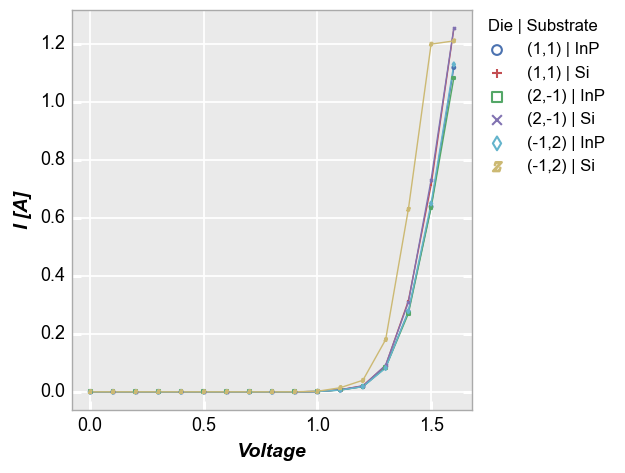

In [26]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_size=2)

Marker size can also be controlled point-by-point by defining values in a separate DataFrame column.  In this example, we set the marker size of each point to be 10x the value of the voltage plotted on the x-axis:

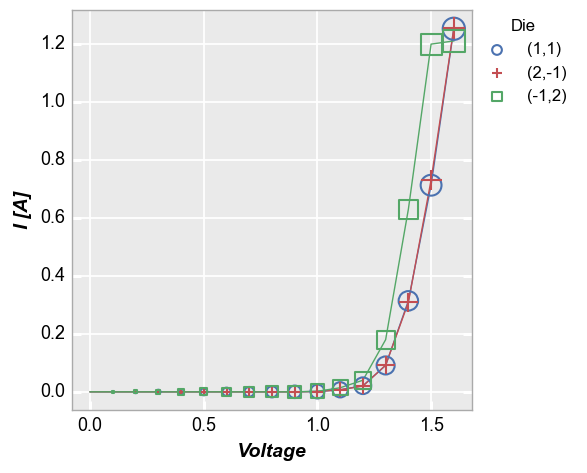

In [27]:
df['Marker Size'] = df['Voltage'] * 10
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', marker_size='Marker Size',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

The legend marker size can be controlled independently if needed using the keyword `legend_marker_size`:

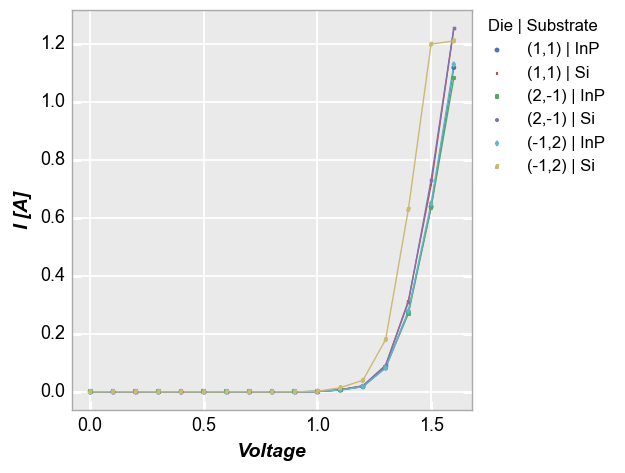

In [28]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'],
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_size=2, legend_marker_size=2)

## Fonts

All text elements (plot title, labels, etc.) can be styled via the font attributes associated with the object.  

.. note:: The font family "fantasy" used below looks an awful lot like comic sans.  Use of comic sans should be banned globally with severe penalties attached.

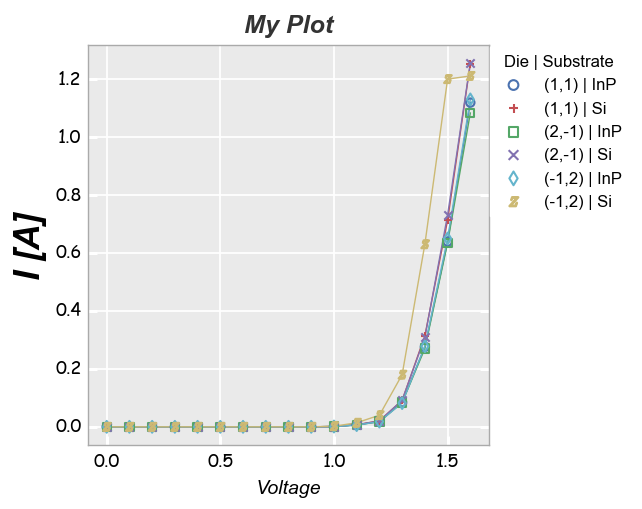

In [29]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         title='My Plot', title_font_style='italic', 
         label_y_font_size=25, label_y_style='normal',
         label_x_font_weight='normal',
         tick_labels_major_font='fantasy')

## Themes

Theme files are used to apply user style preferences to all plots *without explicitly stating them in keyword arguments*.  These `.py` files are populated with dictionaries and lists of style settings.  A theme file can be applied globally using the command `fcp.set_theme()`.  Once a theme file is selected, a local copy is made in a <Users>/.fivecentplots directory. **fivecentplots** provides both a "gray" and and "white" theme to get started.  You can modify this local file as you wish to get the exact, consistent look you desire.
    
    
<br>The theme file consists of three main parts:

<br>
1) `fcp_params`:  this is a python dictionary that contains any `fcp` keyword argument for which you want to override the default:

    fcp_params = {'ax_edge_color': '#aaaaaa',
                  'ax_fill_color': '#eaeaea',
                  'ax_size': [400,400],  # [width, height]
                 }
             
<br>2) `colors`: a list of default colors

    colors = ['#000000', '#111111', '#222222']

<br>3) `markers`: a list of default markers

    markers = ['+', 'o', 'd', '$']

<br> When an ``Element`` attribute is defined in the code, kwargs are selected with the following order of priority:

<br>1) keywords explicitly listed in the function call

<br>2) keywords defined in the local theme file

<br>3) built-in default values

<br>4) when using the **matplotlib** engine, any ``rcParam`` overrides you may have defined on your system

Themes are stored in a local user directory (in Windows: `C:\Users\you\.fivecentplots` | in Linux: ``/home/you/.fivecentplots``).  The theme you selected is copied to a new file called `defaults.py`.  All defaults are pulled from this file.  

You can switch between themes using the prompt displayed after executing the `fcp.set_theme()` command.  This will open a list of all built-in themes and any custom themes found in your user directory (these files must have a different name than `defaults.py`).  The old theme file will be backed up to `defaults_old.py` while the new theme file will be copied to `defaults.py`.  You can also pass the name of a theme file directly to `set_theme` to skip the dialog.  However, if you have a custom theme file in your user directory with the same name as one of the master theme files, `set_theme` will always give preference to the built-in themes, <i>not</i> your custom theme.

<b> Note: If you create a good theme that you think others can benefit from, feel free to submit it via the github page for this project.</b>

### White default theme

In [30]:
fcp.set_theme('white')

Previous theme file found! Renaming to "defaults_old.py" and copying theme "white"...done!


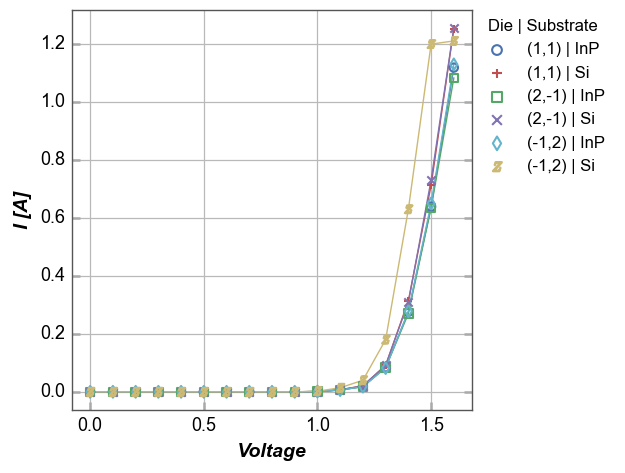

In [31]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Gray default theme

In [32]:
fcp.set_theme('gray')

Previous theme file found! Renaming to "defaults_old.py" and copying theme "gray"...done!


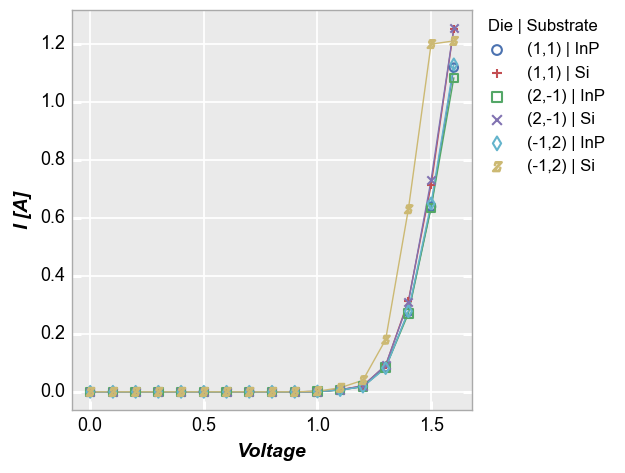

In [33]:
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], 
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### On the fly

As of version 0.4.0, themes can also be swapped on the fly without globally settting the theme using the ``theme`` keyword.  The value of the keyword is the full path to the alternate theme file or the just the name of a theme file.

In the example below, the default theme is set to gray but we override at the plot call and use the built-in "white" theme:

Previous theme file found! Renaming to "defaults_old.py" and copying theme "gray"...done!


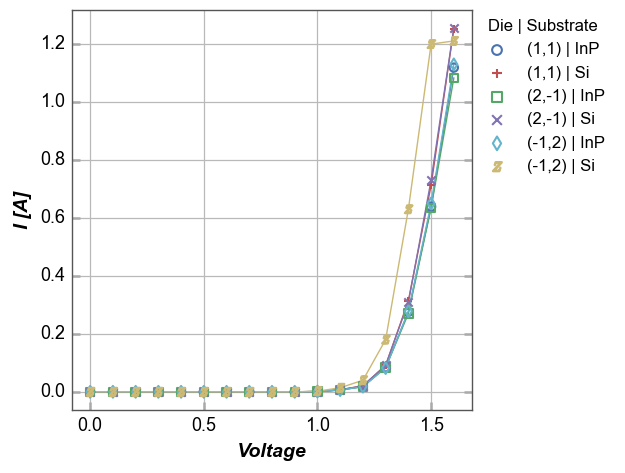

In [34]:
fcp.set_theme('gray')
fcp.plot(df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'],
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', theme='white')